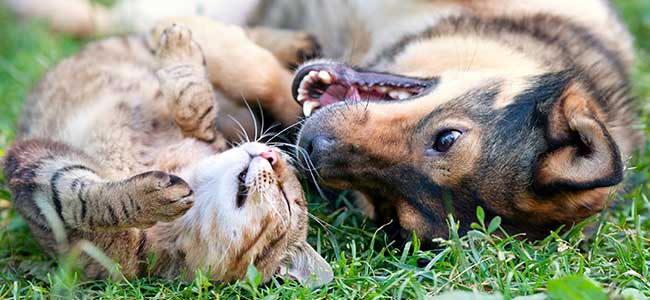

In [1]:
# Objectif : 
# - Nettoyage du dataset qui contient les différents produits et leurs compositions
# - Créer un début de scoring des différents produits en fonction de leurs compositions.

# Partie 1 : Preprocessing du dataset qui contient la recette des produits

## Récupération du dataset contenant la liste d'ingrédient

In [ ]:
#Importation du dataset
import pandas as pd
import numpy as np
df = pd.read_excel('/content/Dataset des produits et ingrédients.xlsx', index_col=0, skiprows=1)
df.head()

,Source,name,quantity,packaging,brand,categories_tags,main_category,ingredients_text,image_front_url,image_front_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,humidity,proteins_100g,fat_100g,saturated_fat_100g,cendars_100g,fiber_100g,carbohydrates_100g,sugars_100g,salt_100g,amidon,calcium_100g,phosphorus_100g,potassium_100g,sodium_100g,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,vitamin_a_100g,vitamin_d_100g,vitamin_e_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,pantothenic_acid_100g,vitamin_b6_100g,biotin_100g,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Users,aliments complets pour chat mousses,\N,Boite métal,Casino,aliments humides,chats,Mousse au lapin (3 boïtes) : Viandes et sous-p...,https://s3.eu-west-3.amazonaws.com/gamelle/pub...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,\N,https://static.openpetfoodfacts.org/images/pro...,78,11,6,\N,2,0.2,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,384,36,\N,\N,\N,\N,\N,\N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Users,Boeuf charolais et truite au riz complet,10 kg,Sac plastique,Lukullus,aliments secs,chiens,26 % viande de boeuf charolais déshydratée et ...,https://s3.eu-west-3.amazonaws.com/gamelle/pub...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,\N,\N,10,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Users,Chats stérilisé optirenal Saumon,"1,5kg",\N,Pro Plan,aliments secs,chats,Saumon (20%). protéines de volaille déshydraté...,https://s3.eu-west-3.amazonaws.com/gamelle/pub...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,\N,\N,5,41,12,\N,7.5,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,32000,1000,670,\N,\N,\N,\N,\N,\N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Users,Senior 7+ Chats stérilisés Poulet,"1,4kg",Sac plastique,Perfect Fit,aliments secs,chats senior,Composition: protéines de volaille déshydratée...,https://s3.eu-west-3.amazonaws.com/gamelle/pub...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,\N,https://static.openpetfoodfacts.org/images/pro...,5,38,13,\N,8.5,\N,\N,\N,\N,\N,0.89,0.94,\N,\N,\N,\N,\N,9181,1013,1350,\N,\N,\N,\N,\N,0.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Users,Terrine Bio au poulet et aux legumes,300 g,\N,Carrefour,aliments humides,chiens,Viandes* et sous produits animaux* (dont poule...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/images/pro...,https://static.openpetfoodfacts.org/

In [ ]:
df.columns

Index(['Source', 'name', 'quantity', 'packaging', 'brand', 'categories_tags',
       'main_category', 'ingredients_text', 'image_front_url',
       'image_front_small_url',
       ...
       'Unnamed: 132', 'Unnamed: 133', 'Unnamed: 134', 'Unnamed: 135',
       'Unnamed: 136', 'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139',
       'Unnamed: 140', 'Unnamed: 141'],
      dtype='object', length=141)

## Suppréssion des valeurs manquantes

### Suppréssion des colonnes NaN

In [ ]:
df = df.dropna(axis = 1)

In [ ]:
a = df['quantity'].unique()
a[0]

'\\N'

In [ ]:
df = df.replace(a[0], np.nan)
df.head()
df.shape

(4069, 70)

In [ ]:
ingredients = pd.DataFrame(df['ingredients_text'])
print(ingredients.head())
print()
print('Le nombre de ligne du dataset avec les valeurs manquantes sont de: {}'.format(len(ingredients)))
print(ingredients.shape)

                                     ingredients_text
id                                                   
1   Mousse au lapin (3 boïtes) : Viandes et sous-p...
2   26 % viande de boeuf charolais déshydratée et ...
3   Saumon (20%). protéines de volaille déshydraté...
4   Composition: protéines de volaille déshydratée...
5   Viandes* et sous produits animaux* (dont poule...

Le nombre de ligne du dataset avec les valeurs manquantes sont de: 4069
(4069, 1)


### Suppréssion des lignes NaN

In [ ]:
#Suppression des lignes NaN 
ingredients = ingredients.dropna()
print('Le nombre de ligne du dataset sans les valeurs manquantes sont de: {}'.format(len(ingredients)))

Le nombre de ligne du dataset sans les valeurs manquantes sont de: 3706


In [ ]:
type(ingredients['ingredients_text'])

pandas.core.series.Series

## Nettoyage du Dataset

### Conservation des lignes contenant des strings (du texte) et suppressions des integers

In [ ]:
[i for i in set([type(i) for i in ingredients['ingredients_text']])]

[int, str]

In [ ]:
ingredients['ingredients_type'] = ingredients['ingredients_text'].apply(lambda x: type(x))
ingredients.head()

,ingredients_text,ingredients_type
id,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,<class 'str'>
2,26 % viande de boeuf charolais déshydratée et ...,<class 'str'>
3,Saumon (20%). protéines de volaille déshydraté...,<class 'str'>
4,Composition: protéines de volaille déshydratée...,<class 'str'>
5,Viandes* et sous produits animaux* (dont poule...,<class 'str'>


In [ ]:
ingredients = ingredients.loc[ingredients['ingredients_type']== str, :]

In [ ]:
ingredients.shape

(3704, 2)

### Suppression des termes après "MODE D'EMPLOI:" dans les listes d'ingrédients

In [ ]:
import re
def remove_mode_demploi(texte):
  if "MODE D'EMPLOI" in texte:
    texte = texte.split("MODE D'EMPLOI")[0]
  return texte


In [ ]:
ingredients['ingredients_corrected'] = ingredients['ingredients_text'].apply(lambda x: remove_mode_demploi(x))
ingredients.head()

,ingredients_text,ingredients_type,ingredients_corrected
id,,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,<class 'str'>,Mousse au lapin (3 boïtes) : Viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...,<class 'str'>,26 % viande de boeuf charolais déshydratée et ...
3,Saumon (20%). protéines de volaille déshydraté...,<class 'str'>,Saumon (20%). protéines de volaille déshydraté...
4,Composition: protéines de volaille déshydratée...,<class 'str'>,Composition: protéines de volaille déshydratée...
5,Viandes* et sous produits animaux* (dont poule...,<class 'str'>,Viandes* et sous produits animaux* (dont poule...


### Suppression des termes "Composition :" dans les listes d'ingrédients

In [ ]:
def remove_composition(texte):
  if "Composition:" in texte:
    texte = texte.split("omposition:")[1]
  elif "COMPOSITION:" in texte:
    texte = texte.split('OMPOSITION:')[1]
  elif "composition :" in texte:
    texte = texte.split("omposition :")[1]
  elif "COMPOSITION :" in texte:
    texte = texte.split("OMPOSITION :")[1]
  return texte
ingredients['ingredients_corrected+'] = ingredients['ingredients_corrected'].apply(lambda x: remove_composition(x))
ingredients.head()

,ingredients_text,ingredients_type,ingredients_corrected,ingredients_corrected+
id,,,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,<class 'str'>,Mousse au lapin (3 boïtes) : Viandes et sous-p...,Mousse au lapin (3 boïtes) : Viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...,<class 'str'>,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais déshydratée et ...
3,Saumon (20%). protéines de volaille déshydraté...,<class 'str'>,Saumon (20%). protéines de volaille déshydraté...,Saumon (20%). protéines de volaille déshydraté...
4,Composition: protéines de volaille déshydratée...,<class 'str'>,Composition: protéines de volaille déshydratée...,protéines de volaille déshydratées (dont poul...
5,Viandes* et sous produits animaux* (dont poule...,<class 'str'>,Viandes* et sous produits animaux* (dont poule...,Viandes* et sous produits animaux* (dont poule...


In [ ]:
ingredients["ingredients_corrected+"] = ingredients["ingredients_corrected+"].apply(lambda x: x.strip())
ingredients.head()

,ingredients_text,ingredients_type,ingredients_corrected,ingredients_corrected+
id,,,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,<class 'str'>,Mousse au lapin (3 boïtes) : Viandes et sous-p...,Mousse au lapin (3 boïtes) : Viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...,<class 'str'>,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais déshydratée et ...
3,Saumon (20%). protéines de volaille déshydraté...,<class 'str'>,Saumon (20%). protéines de volaille déshydraté...,Saumon (20%). protéines de volaille déshydraté...
4,Composition: protéines de volaille déshydratée...,<class 'str'>,Composition: protéines de volaille déshydratée...,protéines de volaille déshydratées (dont poule...
5,Viandes* et sous produits animaux* (dont poule...,<class 'str'>,Viandes* et sous produits animaux* (dont poule...,Viandes* et sous produits animaux* (dont poule...


In [ ]:
ingredients.iloc[202, 3]

'sc les aliments secs de 10 seu animal as quantidades indicadas. lée à disposition de votre 10 do seu gato. s brutes : 3%. humidité : 80%. mg/kg. Iodure de potassium : 02 a : 1 g/kg). Au cabittaud et aux aneux : mg/kg. Sulfate de zinc tionnels (Vitamine 03 : 320 U.I.tkg. raté : 10 mg/kg). Additifs e D3 : 320 U.I./kg. Oxyde ferrique : g). Additifs technologiques (Gomme humidade: 80%. to de potassio: 0.2 mg/kg. Oxido . Com bacaihau e cenouras: corantes. e éinco mono-hidratado: 10 mg/kg). 1. Oxido férrico: 42.2 mg/kg. lodeto de os (Goma de céssia: g/kg). Com pato e mg/kg. Oxido manganosoé. mg/kg. = 1209'

In [ ]:
#Suppréssion des colonnes dont nous n'avons plus besoin : 

ingredients = ingredients.drop(columns = ["ingredients_text", "ingredients_type", "ingredients_corrected"], axis = 1)

In [ ]:
ingredients['ingredients_text'] = ingredients['ingredients_corrected+']
ingredients = ingredients.drop(columns = ["ingredients_corrected+"], axis = 1)
ingredients.head()

,ingredients_text
id,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...
3,Saumon (20%). protéines de volaille déshydraté...
4,protéines de volaille déshydratées (dont poule...
5,Viandes* et sous produits animaux* (dont poule...


## Ajout de séparateurs pour chaque ingrédient 

In [ ]:
#Filtrage des listes d'ingrédients en ajoutant un séparateur (**) 
ingredients['ingredients_text_split'] = ingredients['ingredients_text'].apply(lambda x: x.replace('*', '').replace('é','e').replace('ï','i').replace('  ', ' ').replace(' - ', '**').replace('; ', '**').replace('minérales ', 'minérales**').replace('[a-z],[a-z]','[a-z]**[a-z]').replace('\r\n',''))
ingredients['ingredients_text_split'] = ingredients['ingredients_text_split'].apply(lambda x: x.replace('. ', '**').replace(', ', '**').replace('  ', '**').replace('sous-pro**duits', 'sous-produits').lower())
ingredients.shape

(3704, 2)

In [ ]:
#Fonction pour ajouter ** entre [a-Z] [A-Z]
import re
def treatement(liste):
  m_liste = [] 
  for i in liste:
    text_split = re.split('[a-z] [A-Z]', i)
    text_find = re.findall('[a-z] [A-Z]', i)
    result = text_split[0]
    text_find = [text.replace(' ', '**') for text in text_find]
    for find,split in zip(text_find, text_split[1:]):
      result+= find + split 
    m_liste.append(result)
  return m_liste


ingredients['ingredients_space_corrected'] = treatement(ingredients['ingredients_text_split'])
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected
id,,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...
3,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...
4,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...
5,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...


In [ ]:
#Suppression des étoiles dans les parenthèses : 
m_liste = []
def traitement(liste): 
  for i in liste:
    text_split = re.split('\(([^\)]+)\)', i)
    result = ""
    for t, text_ in enumerate(text_split):
      if t%2==1 : 
        text_ = '(' + text_.replace('**', ' ') + ')'
      result += text_
    m_liste.append(result)

traitement(ingredients['ingredients_space_corrected'])
ingredients.shape

(3704, 3)

In [ ]:
ingredients['ingredients_text_corrected_split+'] = m_liste
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+
id,,,,
1,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...
2,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...
3,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...
4,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...
5,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...


In [ ]:
ingredients.tail()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+
id,,,,
4085,"Viandes et sous-produits animaux, extraits de ...",viandes et sous-produits animaux**extraits de ...,viandes et sous-produits animaux**extraits de ...,viandes et sous-produits animaux**extraits de ...
4086,"Viandes et sous-produits animaux, céréales, so...",viandes et sous-produits animaux**cereales**so...,viandes et sous-produits animaux**cereales**so...,viandes et sous-produits animaux**cereales**so...
4087,"Viandes et sous-produits animaux, sous-produit...",viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...
4088,"Viandes et sous-produits animaux, sous-produit...",viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...
4089,"Viandes et sous-produits animaux, poissons et ...",viandes et sous-produits animaux**poissons et ...,viandes et sous-produits animaux**poissons et ...,viandes et sous-produits animaux**poissons et ...


In [ ]:
ingredients['ingredients_text_corrected_split++'] = ingredients['ingredients_text_corrected_split+'].astype(str).apply(lambda x: x.split('**'))
ingredients.tail()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++
id,,,,,
4085,"Viandes et sous-produits animaux, extraits de ...",viandes et sous-produits animaux**extraits de ...,viandes et sous-produits animaux**extraits de ...,viandes et sous-produits animaux**extraits de ...,"[viandes et sous-produits animaux, extraits de..."
4086,"Viandes et sous-produits animaux, céréales, so...",viandes et sous-produits animaux**cereales**so...,viandes et sous-produits animaux**cereales**so...,viandes et sous-produits animaux**cereales**so...,"[viandes et sous-produits animaux, cereales, s..."
4087,"Viandes et sous-produits animaux, sous-produit...",viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,"[viandes et sous-produits animaux, sous-produi..."
4088,"Viandes et sous-produits animaux, sous-produit...",viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,viandes et sous-produits animaux**sous-produit...,"[viandes et sous-produits animaux, sous-produi..."
4089,"Viandes et sous-produits animaux, poissons et ...",viandes et sous-produits animaux**poissons et ...,viandes et sous-produits animaux**poissons et ...,viandes et sous-produits animaux**poissons et ...,"[viandes et sous-produits animaux, poissons et..."


In [ ]:
# Exemple d'une liste contenant les séparateurs (**) pour chaque ingrédient.
ingredients.iloc[156,3]

'au poulet : riz de brasserie**amidon de mais**froment**farine de gluten de mais**proteines deshydratees de poulet (18 %) et de dinde**hydrolysat**graines de lin**pulpe de betterave sechee**mineraux**orge**avoine**graisses animales**poudre de racine de gingembre**huile de soja**vitamines**l-carnitine**oligo-elements**taurine et beta-carotene**avec un antioxydant naturel (melange de tocopherols)'

## Filtrage sur les listes d'ingrédients (Pour garder ceux qui sont des listes d'ingrédients en français)

In [ ]:
corpus = ingredients['ingredients_text']
stripped_corpus = [text.strip() for text in corpus]
join_corpus = " ".join(stripped_corpus)
clean_corpus = join_corpus.lower() 


In [ ]:
clean_corpus = clean_corpus.split(' ')

### Récupération de tous les mots et caractère du dataset

In [ ]:
#Création d'une variable qui content l'ensemble des mots et des caractères du dataset.
clean_corpus

['mousse',
 'au',
 'lapin',
 '(3',
 'boïtes)',
 ':',
 'viandes',
 'et',
 'sous-produits',
 'animaux',
 '(dont',
 'lapin',
 '4%)',
 '-',
 'substances',
 'minérales',
 '-',
 'sous-produits',
 "d'origine",
 'végétale',
 'mousse',
 'au',
 'foie',
 '(3',
 'boïtes)',
 ':',
 'viandes',
 'et',
 'sous-produits',
 'animaux',
 '(dont',
 'foie',
 '4%)',
 '-',
 'substances',
 'minérales',
 'sous-produits',
 "d'origine",
 'végétale',
 'mousse',
 'au',
 'saumon',
 '(3',
 'boïtes)',
 'viandes',
 'et',
 'sous-produits',
 'animaux',
 '-',
 'poissons',
 'et',
 'sous-produits',
 'de',
 'poissons',
 '(dont',
 'saumon',
 '4%)',
 '-',
 'substances',
 'minérales',
 '-',
 'sous-produits',
 "d'origine",
 'végétal',
 'mousse',
 'au',
 'poulet',
 '(3',
 'boites):',
 'viandes',
 'et',
 'sous-produits',
 'animaux',
 '(dont',
 'poulet',
 '4%)',
 '-',
 'substances',
 'minérales',
 '-',
 'sous-pro',
 '-',
 'duits',
 "d'origine",
 'végétale',
 '26',
 '%',
 'viande',
 'de',
 'boeuf',
 'charolais',
 'déshydratée',
 'et',

In [ ]:
# Librairie incluant les stops words en français
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ay

###Filtre des mots en supprimant les stopwords, en conservant les termes alphanumériques et les supprimer les termes qui n'ont pas de caractères spéficiques. 

In [ ]:
#Filtre des mots en supprimant les stopwords, en conservant les termes alphanumériques et les supprimer les termes qui n'ont pas de caractères spéficiques. 
filtered_words = [word for word in clean_corpus if word not in stopwords.words('french') and word.isalpha() and word.isidentifier()]
filtered_words

['mousse',
 'lapin',
 'viandes',
 'animaux',
 'lapin',
 'substances',
 'minérales',
 'végétale',
 'mousse',
 'foie',
 'viandes',
 'animaux',
 'foie',
 'substances',
 'minérales',
 'végétale',
 'mousse',
 'saumon',
 'viandes',
 'animaux',
 'poissons',
 'poissons',
 'saumon',
 'substances',
 'minérales',
 'végétal',
 'mousse',
 'poulet',
 'viandes',
 'animaux',
 'poulet',
 'substances',
 'minérales',
 'duits',
 'végétale',
 'viande',
 'boeuf',
 'charolais',
 'déshydratée',
 'riz',
 'complet',
 'tourteau',
 'germes',
 'truite',
 'déshydratée',
 'huile',
 'colza',
 'pressée',
 'algues',
 'marines',
 'graines',
 'pulpe',
 'germes',
 'herbes',
 'poires',
 'pommes',
 'jaune',
 'huile',
 'graines',
 'chardon',
 'argile',
 'extrait',
 'chair',
 'mollusques',
 'base',
 'perna',
 'yucca',
 'schidigera',
 'déshydraté',
 'myrtilles',
 'vitamine',
 'a',
 'vitamine',
 'vitamine',
 'acétate',
 'totalement',
 'mononitrate',
 'chlorhydrate',
 'acide',
 'chlorure',
 'oxyde',
 'oxyde',
 'iodate',
 'calciu

In [ ]:
#Contage des mots les plus retrouvés.
from collections import Counter
word_freq = Counter(filtered_words)
common_words = word_freq.most_common()
len(common_words)

2068

In [ ]:
common_words

[('protéines', 4601),
 ('huile', 3300),
 ('poulet', 1853),
 ('hydrolysat', 1842),
 ('pulpe', 1675),
 ('volaille', 1418),
 ('farine', 1378),
 ('substances', 1336),
 ('extrait', 1286),
 ('gluten', 1125),
 ('viandes', 1086),
 ('graisse', 1085),
 ('levure', 1011),
 ('graisses', 996),
 ('graines', 881),
 ('extraits', 827),
 ('saumon', 785),
 ('fibres', 779),
 ('viande', 759),
 ('animaux', 756),
 ('poissons', 755),
 ('sels', 754),
 ('pois', 724),
 ('déshydratées', 679),
 ('protéine', 635),
 ('rose', 629),
 ('frais', 617),
 ('huiles', 606),
 ('pomme', 604),
 ('pommes', 590),
 ('foie', 566),
 ('betterave', 556),
 ('déshydratée', 549),
 ('dinde', 537),
 ('déshydraté', 510),
 ('carottes', 483),
 ('légumes', 482),
 ('levures', 455),
 ('très', 453),
 ('chlorure', 448),
 ('poisson', 444),
 ('isolat', 443),
 ('sulfate', 431),
 ('haute', 425),
 ('porc', 422),
 ('riz', 418),
 ('terre', 396),
 ('animales', 378),
 ('racine', 378),
 ('produits', 375),
 ('yucca', 374),
 ('poudre', 371),
 ('cartilage', 337

In [ ]:
# On récupère les 200 premiers mots les plus employés afin de les utiliser comme filtre pour les listes d'ingrédients.
# Si la liste d'ingrédient ne contient pas un des 200 mots de la liste, on supprime la liste d'ingrédient (on prend le risque que cette liste d'ingrédient ne contient pas d'ingrédient).
words_200 = common_words[0:200]
filtre_ingredients = [x[0] for x in words_200]
filtre_ingredients

['protéines',
 'huile',
 'poulet',
 'hydrolysat',
 'pulpe',
 'volaille',
 'farine',
 'substances',
 'extrait',
 'gluten',
 'viandes',
 'graisse',
 'levure',
 'graisses',
 'graines',
 'extraits',
 'saumon',
 'fibres',
 'viande',
 'animaux',
 'poissons',
 'sels',
 'pois',
 'déshydratées',
 'protéine',
 'rose',
 'frais',
 'huiles',
 'pomme',
 'pommes',
 'foie',
 'betterave',
 'déshydratée',
 'dinde',
 'déshydraté',
 'carottes',
 'légumes',
 'levures',
 'très',
 'chlorure',
 'poisson',
 'isolat',
 'sulfate',
 'haute',
 'porc',
 'riz',
 'terre',
 'animales',
 'racine',
 'produits',
 'yucca',
 'poudre',
 'cartilage',
 'petits',
 'dont',
 'canard',
 'chicorée',
 'composants',
 'téguments',
 'croquettes',
 'hareng',
 'graine',
 'amidon',
 'boeuf',
 'sélectionnées',
 'sélectionnée',
 'feuilles',
 'lin',
 'entier',
 'vitamine',
 'fraîche',
 'sous',
 'psyllium',
 'bœuf',
 'algues',
 'végétale',
 'additifs',
 'canneberges',
 'agneau',
 'myrtilles',
 'crustacés',
 'déshydratés',
 'crustacé',
 'fibr

In [ ]:
#Suppréssions des mots dans les common_words qui ne sont soit pas des ingrédients, soit des mots trop petits (ex: 'riz')
item_list = ['haute', 'très', 'dont', 'petits', 'sous', 'équivalent', 'base', 'a', 'sources', 'indigestible', 'mg', 'sans', 'trés', 'lin', 'sel', 'orge', 'riz', 'nutritionnels', 'fraiche', 'frais', 'issu', 'sélectionnées', 'sélectionnée', 'complet', 'min', 'vert', 'source', 'zinc', 'marc','animaux']
final_list = list(set(filtre_ingredients) - set(item_list))
filtre_ingredients = final_list
filtre_ingredients

['crustacés',
 'épinards',
 'végétale',
 'boeuf',
 'protéines',
 'carbonate',
 'entières',
 'citrouille',
 'varech',
 'pomme',
 'racine',
 'déshydratées',
 'chou',
 'lait',
 'chondroïtine',
 'biére',
 'entier',
 'isolat',
 'graisses',
 'cellulose',
 'composition',
 'hydrolysées',
 'luzerne',
 'canard',
 'graine',
 'dinde',
 'crustacé',
 'huiles',
 'viande',
 'courge',
 'foies',
 'composants',
 'brocoli',
 'additifs',
 'cuivre',
 'poulet',
 'psyllium',
 'sels',
 'concentré',
 'feuilles',
 'mollusques',
 'substances',
 'plantes',
 'céréales',
 'pommes',
 'schidigera',
 'potiron',
 'panais',
 'thé',
 'patate',
 'biologique',
 'terre',
 'volaille',
 'airelles',
 'blé',
 'séchée',
 'noix',
 'thon',
 'protéique',
 'herbes',
 'animale',
 'marines',
 'filet',
 'moulu',
 'algues',
 'fleurs',
 'pois',
 'issues',
 'calcium',
 'poudre',
 'produit',
 'désossé',
 'porc',
 'légumes',
 'lactobacillus',
 'graisse',
 'levure',
 'hareng',
 'truite',
 'betteraves',
 'bœuf',
 'vitamines',
 'fibres',
 'pers

###Filtre des listes d'ingrédients en ne conservant que ceux qui ont un des 200 common_words

In [ ]:
newcol = []
for _, x in ingredients.iterrows():
  newcol_ = []
  for ingredient in filtre_ingredients:
    if ingredient in x[0].lower():
      newcol_.append(True)
    else:
      newcol_.append(False)
  newcol.append(newcol_)
newcol[:5]

[[False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  

In [ ]:
masque = []
for liste in newcol:
  if True in liste:
    masque.append(True)
  else:
    masque.append(False)

ingredients = ingredients.reset_index()[masque]

In [ ]:
# Environ une dizaine de lignes supprimées
ingredients.shape

(3692, 6)

In [ ]:
 ingredients = ingredients.drop(columns = ['id'], axis=1)
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++
0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...
1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...
2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat..."
3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...
4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...


In [ ]:
#La ligne 254 ne contenait pas de liste d'ingrédient. Il a finalement était supprimé.
ingredients.iloc[350,4]

['canard :\nviandes et sous-produits animaux (dont canard 4 %)',
 'extraits de proteines vegetales',
 'poissons et sous-produits de poissons',
 'substances minerales',
 'sucres',
 'levures.\npoulet :\nviandes et sous-produits animaux (dont poulet 4 %)',
 'extraits de proteines vegetales',
 'poissons et sous-produits de poissons',
 'substances minerales',
 'sucres',
 'levures.\ndinde :\nviandes et sous-produits animaux (dont dinde 4 %)',
 'extraits de proteines vegetales',
 'poissons et sous-produits de poissons',
 'substances minerales',
 'sucres',
 'levures.']

## Lemmatisation des listes d'ingrédients

### Lemmatisation et séparation des ingrédients

In [ ]:
!pip install spacy
import spacy
!python -m spacy download fr_core_news_sm
import fr_core_news_sm
from spacy.lang.fr.stop_words import STOP_WORDS
nlp = fr_core_news_sm.load()

     |████████████████████████████████| 14.7MB 86.7MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp36-none-any.whl size=14727027 sha256=c324a0af3501682ef4fee15964e5b78ce1d61194b7b6bf797ff90eccbe136735
  Stored in directory: /tmp/pip-ephem-wheel-cache-osqjrnc5/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
ingredients["lemma"] = ingredients["ingredients_text_corrected_split+"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x.replace("**"," ** ")) if token.text not in STOP_WORDS]))

In [ ]:
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++,lemma
0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...,mousse lapin ( 3 boite ) : viande sous-produit...
1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...,26 pourcent viande boeuf charolais deshydratee...
2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat...",saumon ( 20 pourcent ) * * proteine volaille d...
3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...,proteine volaille deshydratees ( poulet 18 pou...
4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...,viande produit animal ( poulet 5 pourcent min ...


In [ ]:
ingredients["lemma_split"]= ingredients["lemma"].apply(lambda x: x.split("* *"))
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++,lemma,lemma_split
0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...,mousse lapin ( 3 boite ) : viande sous-produit...,[mousse lapin ( 3 boite ) : viande sous-produi...
1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...,26 pourcent viande boeuf charolais deshydratee...,[26 pourcent viande boeuf charolais deshydrate...
2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat...",saumon ( 20 pourcent ) * * proteine volaille d...,"[saumon ( 20 pourcent ) , proteine volaille d..."
3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...,proteine volaille deshydratees ( poulet 18 pou...,[proteine volaille deshydratees ( poulet 18 po...
4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...,viande produit animal ( poulet 5 pourcent min ...,[viande produit animal ( poulet 5 pourcent min...


In [ ]:
ingredients.iloc[225,5]

'aliment complet chat ege imperatif : chan emer aliment chat probablement manger jusque e present aliment contenir glucide * * proceder imperativemer transition progressif ( cf tableau ) * * recommandatier journaliere : voir tableau * * ration indiqueer - varier race * * ege * * temperament * * climat ( froid chaud ) activite * * eau fraich disposition * * transport * * conservation : aliment conservateur artificiel conserve endroit sec frais * * abri lumiere soleil * * refermer sac usage * * : viande poulet sechee 63 pourcent * * patat douce 14 pourcent * * viande dinde sechee 796 * * graisse poulet * * bouillon poulet * * graisse dinde * * graisse canard * * mineral * * vitaminer * * tomate * * psyllium * * analyse moyenne : proteine brute 51 pourcent * * graisse brute 19 pourcent * * fibre brut 2 pourcent * * cendre bruter 9.5 pourcent * * humidite 7 pourcent * * calcium 1.96 pourcent * * phosphore 1.24 pourcent * * vitamine sur kilogramme : vit * * 20.000 icj * *   * * voir * * d3 

### Récupération des 10 premiers ingrédients et filtrage (Pour récupérer que des ingrédients)

In [ ]:
ingredients["lemma_split_10"] = ingredients['lemma_split'].apply(lambda x: x[0:10])
ingredients.head()

,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++,lemma,lemma_split,lemma_split_10
0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...,mousse lapin ( 3 boite ) : viande sous-produit...,[mousse lapin ( 3 boite ) : viande sous-produi...,[mousse lapin ( 3 boite ) : viande sous-produi...
1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...,26 pourcent viande boeuf charolais deshydratee...,[26 pourcent viande boeuf charolais deshydrate...,[26 pourcent viande boeuf charolais deshydrate...
2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat...",saumon ( 20 pourcent ) * * proteine volaille d...,"[saumon ( 20 pourcent ) , proteine volaille d...","[saumon ( 20 pourcent ) , proteine volaille d..."
3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...,proteine volaille deshydratees ( poulet 18 pou...,[proteine volaille deshydratees ( poulet 18 po...,[proteine volaille deshydratees ( poulet 18 po...
4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...,viande produit animal ( poulet 5 pourcent min ...,[viande produit animal ( poulet 5 pourcent min...,[viande produit animal ( poulet 5 pourcent min...


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


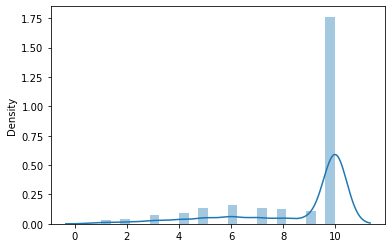

In [ ]:
import seaborn as sns
len_ingredient = []
for x in ingredients['lemma_split_10']:
  len_ingredient.append(len(x))
sns.distplot(len_ingredient)

In [ ]:
all_ingredients = ingredients["lemma_split_10"]
all_ingredients_liste = []
for element in all_ingredients:
  all_ingredients_liste += element

### Création d'un filtre qui va conserver les lignes qui contient des listes d'ingrédients lemmatisés

In [ ]:
all_ingredients_10 = [element.lower().split(" ") for element in all_ingredients_liste]

In [ ]:
grosseliste_10 = []
for product in all_ingredients_10:
  grosseliste_10.extend(product)
grosseliste_10

['mousse',
 'lapin',
 '(',
 '3',
 'boite',
 ')',
 ':',
 'viande',
 'sous-produit',
 'animal',
 '(',
 'lapin',
 '4',
 'pourcent',
 ')',
 '',
 '',
 'substance',
 'minerale',
 '',
 '',
 'sous-produit',
 'origine',
 'vegetal',
 'mousse',
 'foie',
 '(',
 '3',
 'boite',
 ')',
 ':',
 'viande',
 'sous-produit',
 'animal',
 '(',
 'foie',
 '4',
 'pourcent',
 ')',
 '',
 '',
 'substance',
 'minerale',
 'sous-produit',
 'origine',
 'vegetal',
 'mousse',
 'saumon',
 '(',
 '3',
 'boite',
 ')',
 'viande',
 'sous-produit',
 'animal',
 '',
 '',
 'poisson',
 'sous-produit',
 'poisson',
 '(',
 'saumon',
 '4',
 'pourcent',
 ')',
 '',
 '',
 'substance',
 'minerale',
 '',
 '',
 'sous-produit',
 'origine',
 'vegetal',
 'mousse',
 'poulet',
 '(',
 '3',
 'boite',
 ')',
 ':',
 'viande',
 'sous-produit',
 'animal',
 '(',
 'poulet',
 '4',
 'pourcent',
 ')',
 '',
 '',
 'substance',
 'minerale',
 '',
 '',
 'sous-produit',
 'origine',
 'vegetal',
 '26',
 'pourcent',
 'viande',
 'boeuf',
 'charolais',
 'deshydratee',


In [ ]:
grosseliste_10_clean = np.array(grosseliste_10)[[el.isalpha() for el in grosseliste_10]].tolist()
grosseliste_10_clean

['mousse',
 'lapin',
 'boite',
 'viande',
 'animal',
 'lapin',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'foie',
 'boite',
 'viande',
 'animal',
 'foie',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'saumon',
 'boite',
 'viande',
 'animal',
 'poisson',
 'poisson',
 'saumon',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'poulet',
 'boite',
 'viande',
 'animal',
 'poulet',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'pourcent',
 'viande',
 'boeuf',
 'charolais',
 'deshydratee',
 'moudre',
 'pourcent',
 'riz',
 'complet',
 'moulu',
 'pourcent',
 'tourteau',
 'germe',
 'pourcent',
 'truite',
 'deshydrate',
 'moudre',
 'pourcent',
 'huil',
 'colza',
 'presse',
 'froid',
 'algue',
 'marine',
 'deshydrateer',
 'graines',
 'lin',
 'pulpe',
 'betterave',
 'germe',
 'riz',
 'pourcent',
 'herbes',
 'deshydrateer',
 'saumon',
 'pourcent',
 'proteine',
 'volaille',
 'deshydratees',
 

In [ ]:
delete_word = ['pourcent']
grosseliste_10_clean = [i for i in grosseliste_10_clean if i != delete_word]
grosseliste_10_clean

['mousse',
 'lapin',
 'boite',
 'viande',
 'animal',
 'lapin',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'foie',
 'boite',
 'viande',
 'animal',
 'foie',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'saumon',
 'boite',
 'viande',
 'animal',
 'poisson',
 'poisson',
 'saumon',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'mousse',
 'poulet',
 'boite',
 'viande',
 'animal',
 'poulet',
 'pourcent',
 'substance',
 'minerale',
 'origine',
 'vegetal',
 'pourcent',
 'viande',
 'boeuf',
 'charolais',
 'deshydratee',
 'moudre',
 'pourcent',
 'riz',
 'complet',
 'moulu',
 'pourcent',
 'tourteau',
 'germe',
 'pourcent',
 'truite',
 'deshydrate',
 'moudre',
 'pourcent',
 'huil',
 'colza',
 'presse',
 'froid',
 'algue',
 'marine',
 'deshydrateer',
 'graines',
 'lin',
 'pulpe',
 'betterave',
 'germe',
 'riz',
 'pourcent',
 'herbes',
 'deshydrateer',
 'saumon',
 'pourcent',
 'proteine',
 'volaille',
 'deshydratees',
 

In [ ]:
#Comptage des mots les plus retrouvés.
from collections import Counter
word_frequence = Counter(grosseliste_10_clean)
words_freq_most_count = word_freq.most_common()
len(words_freq_most_count)

2068

In [ ]:
words_freq_most_count[0:5]

[('protéines', 4601),
 ('huile', 3300),
 ('poulet', 1853),
 ('hydrolysat', 1842),
 ('pulpe', 1675)]

In [ ]:
# On récupère les 200 premiers mots (lemmatisés) les plus employés afin de les utiliser comme filtre pour les listes d'ingrédients.
the_first_common_words = words_freq_most_count[0:200]
word_lemma_filtre = [x[0] for x in the_first_common_words]
word_lemma_filtre

['protéines',
 'huile',
 'poulet',
 'hydrolysat',
 'pulpe',
 'volaille',
 'farine',
 'substances',
 'extrait',
 'gluten',
 'viandes',
 'graisse',
 'levure',
 'graisses',
 'graines',
 'extraits',
 'saumon',
 'fibres',
 'viande',
 'animaux',
 'poissons',
 'sels',
 'pois',
 'déshydratées',
 'protéine',
 'rose',
 'frais',
 'huiles',
 'pomme',
 'pommes',
 'foie',
 'betterave',
 'déshydratée',
 'dinde',
 'déshydraté',
 'carottes',
 'légumes',
 'levures',
 'très',
 'chlorure',
 'poisson',
 'isolat',
 'sulfate',
 'haute',
 'porc',
 'riz',
 'terre',
 'animales',
 'racine',
 'produits',
 'yucca',
 'poudre',
 'cartilage',
 'petits',
 'dont',
 'canard',
 'chicorée',
 'composants',
 'téguments',
 'croquettes',
 'hareng',
 'graine',
 'amidon',
 'boeuf',
 'sélectionnées',
 'sélectionnée',
 'feuilles',
 'lin',
 'entier',
 'vitamine',
 'fraîche',
 'sous',
 'psyllium',
 'bœuf',
 'algues',
 'végétale',
 'additifs',
 'canneberges',
 'agneau',
 'myrtilles',
 'crustacés',
 'déshydratés',
 'crustacé',
 'fibr

In [ ]:
#Conservation des mots de 3 lettres ou plus:
for x in word_lemma_filtre:
  if len(x) <= 3:
    word_lemma_filtre.remove(x)

In [ ]:
# Au final, il ne reste que des mots avec 3 lettres ou plus:
for x in word_lemma_filtre:
  print(len(x))

9
5
6
10
5
8
6
10
7
6
7
7
6
8
7
8
6
6
6
7
8
4
4
12
8
4
5
6
5
6
4
9
11
5
10
8
7
7
4
8
7
6
7
5
4
5
8
6
8
5
6
9
6
4
6
8
10
9
10
6
6
6
5
13
12
8
6
8
7
4
8
4
6
8
8
11
6
9
9
11
8
5
10
7
8
6
8
5
6
10
7
5
8
8
4
6
5
4
9
9
7
7
11
7
8
4
4
9
5
6
9
9
6
7
6
8
11
7
4
4
9
5
7
7
12
10
5
6
9
7
9
4
7
13
9
7
6
4
4
6
5
6
4
12
11
7
4
6
7
7
6
5
6
5
10
5
6
4
11
4
10
7
7
5
4
7
6
9
9
5
6
7
6
10
7
7
5
7
13
7
4
5
6
4
6
11
6
4
9
8
6


In [ ]:
#Suppréssions des mots dans les mots_lemmatisés qui ne sont pas des produits ou des ingrédients (ex: produire):
words_to_remove = ['substances', 'origine', 'produit', 'source', 'ler', 'équivaloir', 'ingrédients', 'sans', 'moulu', 'indigestible', 'dérivés', 'sans', 'composition', 'ingrédient', 'milligramme', 'mini', 'fraîchement', 'partir', 'produire', 'nutritionnel']
word_lemma_filtre_ = [x for x in word_lemma_filtre if x not in (words_to_remove)]
word_lemma_filtre_

['protéines',
 'huile',
 'poulet',
 'hydrolysat',
 'pulpe',
 'volaille',
 'farine',
 'extrait',
 'gluten',
 'viandes',
 'graisse',
 'levure',
 'graisses',
 'graines',
 'extraits',
 'saumon',
 'fibres',
 'viande',
 'animaux',
 'poissons',
 'sels',
 'pois',
 'déshydratées',
 'protéine',
 'rose',
 'frais',
 'huiles',
 'pomme',
 'pommes',
 'foie',
 'betterave',
 'déshydratée',
 'dinde',
 'déshydraté',
 'carottes',
 'légumes',
 'levures',
 'très',
 'chlorure',
 'poisson',
 'isolat',
 'sulfate',
 'haute',
 'porc',
 'terre',
 'animales',
 'racine',
 'produits',
 'yucca',
 'poudre',
 'cartilage',
 'petits',
 'dont',
 'canard',
 'chicorée',
 'composants',
 'téguments',
 'croquettes',
 'hareng',
 'graine',
 'amidon',
 'boeuf',
 'sélectionnées',
 'sélectionnée',
 'feuilles',
 'entier',
 'vitamine',
 'fraîche',
 'sous',
 'psyllium',
 'bœuf',
 'algues',
 'végétale',
 'additifs',
 'canneberges',
 'agneau',
 'myrtilles',
 'crustacés',
 'déshydratés',
 'crustacé',
 'fibre',
 'schidigera',
 'inuline',


### Filtre des listes d'ingrédients lemmatisés

In [ ]:
newcol = []
for _, x in ingredients.iterrows():
  newcol_ = []
  for ingredient_lemma in word_lemma_filtre_:
    if ingredient_lemma in x[0].lower():
      newcol_.append(True)
    else:
      newcol_.append(False)
  newcol.append(newcol_)
newcol[:5]

[[False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  Fals

In [ ]:
masque = []
for liste in newcol:
  if True in liste:
    masque.append(True)
  else:
    masque.append(False)

ingredients = ingredients.reset_index()[masque]

In [ ]:
ingredients.head()

,index,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++,lemma,lemma_split,lemma_split_10
0,0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...,mousse lapin ( 3 boite ) : viande sous-produit...,[mousse lapin ( 3 boite ) : viande sous-produi...,[mousse lapin ( 3 boite ) : viande sous-produi...
1,1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...,26 pourcent viande boeuf charolais deshydratee...,[26 pourcent viande boeuf charolais deshydrate...,[26 pourcent viande boeuf charolais deshydrate...
2,2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat...",saumon ( 20 pourcent ) * * proteine volaille d...,"[saumon ( 20 pourcent ) , proteine volaille d...","[saumon ( 20 pourcent ) , proteine volaille d..."
3,3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...,proteine volaille deshydratees ( poulet 18 pou...,[proteine volaille deshydratees ( poulet 18 po...,[proteine volaille deshydratees ( poulet 18 po...
4,4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...,viande produit animal ( poulet 5 pourcent min ...,[viande produit animal ( poulet 5 pourcent min...,[viande produit animal ( poulet 5 pourcent min...


In [ ]:
# Au final, quelques lignes ont été supprimés:
ingredients.shape

(3689, 9)

### Résultat final : Recette d'ingrédient en lemmatisé

In [ ]:
ingredients_v2 = pd.DataFrame()
ingredients_v2['recette'] = ingredients['lemma_split_10']
ingredients_v2

,recette
0,[mousse lapin ( 3 boite ) : viande sous-produi...
1,[26 pourcent viande boeuf charolais deshydrate...
2,"[saumon ( 20 pourcent ) , proteine volaille d..."
3,[proteine volaille deshydratees ( poulet 18 po...
4,[viande produit animal ( poulet 5 pourcent min...
...,...
3687,"[viande sous-produit animal , extraire protei..."
3688,"[viande sous-produit animal , cereales , sou..."
3689,"[viande sous-produit animal , sous-produit or..."
3690,"[viande sous-produit animal , sous-produit or..."


In [ ]:
# A ce niveau là, nous voulions garder les recettes en lemmatisés, mais après la création du dictionnaire à partir d'un dictionnaire de référence, la lemmatisation a entraîné des fautes supplémentaires dans le dictionnaire, 
# ce qui a rendu le filtre plus difficile à utiliser. Nous avions donc pris la decision de ne pas utiliser la lemmatisation pour nos labels.

# Partie 2: Utilisation d'un dictionnaire de référence pour créer des labels et déterminer un scoring en fonction des labels

## Importation et nettoyage du dictionnaire de référence

In [ ]:
#Importation du dataset
import pandas as pd
import numpy as np
df = pd.read_excel('/content/Dictionnaire de référence.xlsx', index_col=0)
df.head()

,ingredients_text,ingredients_list,catégorie1,catégorie2,catégorie3,pondération,ingredients_position,text_in_brackets
Code,,,,,,,,
2,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,protéines animales,protéines animales deshydratées,bœuf,NaN,1,NaN
2,26 % viande de boeuf charolais deshydratee et ...,13 % riz complet moulu,céréales,céréales,riz,NaN,2,NaN
2,26 % viande de boeuf charolais deshydratee et ...,13 % tourteau de germes de mais,céréales,céréales,maïs,NaN,3,NaN
2,26 % viande de boeuf charolais deshydratee et ...,6 % truite deshydratee et moulue,protéines animales,protéines animales deshydratées,truite,NaN,4,NaN
2,26 % viande de boeuf charolais deshydratee et ...,5 % huile de colza pressee a froide algues ma...,PB,NaN,NaN,NaN,5,NaN


In [ ]:
df = df.drop(columns = ['text_in_brackets', 'catégorie3', 'pondération'])
df.head()

,ingredients_text,ingredients_list,catégorie1,catégorie2,ingredients_position
Code,,,,,
2,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,protéines animales,protéines animales deshydratées,1
2,26 % viande de boeuf charolais deshydratee et ...,13 % riz complet moulu,céréales,céréales,2
2,26 % viande de boeuf charolais deshydratee et ...,13 % tourteau de germes de mais,céréales,céréales,3
2,26 % viande de boeuf charolais deshydratee et ...,6 % truite deshydratee et moulue,protéines animales,protéines animales deshydratées,4
2,26 % viande de boeuf charolais deshydratee et ...,5 % huile de colza pressee a froide algues ma...,PB,NaN,5


In [ ]:
df['catégorie2'].fillna(df['catégorie1'], inplace = True)
df.head()

,ingredients_text,ingredients_list,catégorie1,catégorie2,ingredients_position
Code,,,,,
2,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,protéines animales,protéines animales deshydratées,1
2,26 % viande de boeuf charolais deshydratee et ...,13 % riz complet moulu,céréales,céréales,2
2,26 % viande de boeuf charolais deshydratee et ...,13 % tourteau de germes de mais,céréales,céréales,3
2,26 % viande de boeuf charolais deshydratee et ...,6 % truite deshydratee et moulue,protéines animales,protéines animales deshydratées,4
2,26 % viande de boeuf charolais deshydratee et ...,5 % huile de colza pressee a froide algues ma...,PB,PB,5


In [ ]:
df = df.drop(columns = ['ingredients_text', 'catégorie1', 'ingredients_position'])
df.head()

,ingredients_list,catégorie2
Code,,
2,26 % viande de boeuf charolais deshydratee et ...,protéines animales deshydratées
2,13 % riz complet moulu,céréales
2,13 % tourteau de germes de mais,céréales
2,6 % truite deshydratee et moulue,protéines animales deshydratées
2,5 % huile de colza pressee a froide algues ma...,PB


In [ ]:
df = df.fillna('autres')

In [ ]:
df['ingredients_list'] = df['ingredients_list'].apply(lambda x: str(x))

## Création des différents labels (catégorie2) en fonction des termes d'ingrédients récurrents

### Nettoyage des termes récurrents

In [ ]:
df_cat = df.groupby(['catégorie2'], as_index = False).agg({'ingredients_list': " === ".join})
df_cat

,catégorie2,ingredients_list
0,sous-produits d'origine vegetale,sous-produits d'origine vegetale === sous-pr...
1,Additifs,taurine === taurine 1500 mg/kg === taurine ...
2,ERR,"* l,i,p === : proteines selectionnees pour l..."
3,Fibres,la farine de caroube === gousse de caroube =...
4,Inuline,"inuline de chicoree (0,1 %) === pulpe de chi..."
5,Isolat,isolat de proteines vegetales* === isolat de...
6,PB,5 % huile de colza pressee a froide algues ma...
7,Vitamines,vitamine a 10 === vitamine c === vitamine d...
8,Végétaux,yucca schidigera deshydrate et moulu === yuc...
9,algues et varech,algues deshydratees === algues deshydratees ...


In [ ]:
# Pour le nettoyage, nous voulons supprimer les chiffres, les %, ce qu'il y a entre parenthèses, les ponctuations et caractères spéciaux.
df_cat['ingredients_list_treat'] = [re.sub('(\([^\(]+\))', '', x) for x in df_cat['ingredients_list']]
df_cat

,catégorie2,ingredients_list,ingredients_list_treat
0,sous-produits d'origine vegetale,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pr...
1,Additifs,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine 1500 mg/kg === taurine ...
2,ERR,"* l,i,p === : proteines selectionnees pour l...","* l,i,p === : proteines selectionnees pour l..."
3,Fibres,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube =...
4,Inuline,"inuline de chicoree (0,1 %) === pulpe de chi...",inuline de chicoree === pulpe de chicoree =...
5,Isolat,isolat de proteines vegetales* === isolat de...,isolat de proteines vegetales* === isolat de...
6,PB,5 % huile de colza pressee a froide algues ma...,5 % huile de colza pressee a froide algues ma...
7,Vitamines,vitamine a 10 === vitamine c === vitamine d...,vitamine a 10 === vitamine c === vitamine d...
8,Végétaux,yucca schidigera deshydrate et moulu === yuc...,yucca schidigera deshydrate et moulu === yuc...
9,algues et varech,algues deshydratees === algues deshydratees ...,algues deshydratees === algues deshydratees ...


In [ ]:
df_cat['ingredients_list_treat+'] = [x.replace("*", '').strip() for x in df_cat["ingredients_list_treat"]]
df_cat["ingredients_list_treat+"] = [re.sub("[0-9]\,[0-9]", '', x) for x in df_cat['ingredients_list_treat+']]
df_cat["ingredients_list_treat+"] = [re.sub("[0-9]", '', x) for x in df_cat['ingredients_list_treat+']]
df_cat["ingredients_list_treat+"] = [x.replace("%","") for x in df_cat['ingredients_list_treat+']]
df_cat

,catégorie2,ingredients_list,ingredients_list_treat,ingredients_list_treat+
0,sous-produits d'origine vegetale,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pro...
1,Additifs,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine mg/kg === taurine === ...
2,ERR,"* l,i,p === : proteines selectionnees pour l...","* l,i,p === : proteines selectionnees pour l...","l,i,p === : proteines selectionnees pour leur..."
3,Fibres,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube ==...
4,Inuline,"inuline de chicoree (0,1 %) === pulpe de chi...",inuline de chicoree === pulpe de chicoree =...,inuline de chicoree === pulpe de chicoree ==...
5,Isolat,isolat de proteines vegetales* === isolat de...,isolat de proteines vegetales* === isolat de...,isolat de proteines vegetales === isolat de p...
6,PB,5 % huile de colza pressee a froide algues ma...,5 % huile de colza pressee a froide algues ma...,huile de colza pressee a froide algues marin...
7,Vitamines,vitamine a 10 === vitamine c === vitamine d...,vitamine a 10 === vitamine c === vitamine d...,vitamine a === vitamine c === vitamine d ==...
8,Végétaux,yucca schidigera deshydrate et moulu === yuc...,yucca schidigera deshydrate et moulu === yuc...,yucca schidigera deshydrate et moulu === yucc...
9,algues et varech,algues deshydratees === algues deshydratees ...,algues deshydratees === algues deshydratees ...,algues deshydratees === algues deshydratees =...


### Split des termes récurrents et suppréssions des répétitions

In [ ]:
df_cat["ingredients_list_treat+_split"] = df_cat["ingredients_list_treat+"].apply(lambda x: x.split("==="))

In [ ]:
df_cat.head()

,catégorie2,ingredients_list,ingredients_list_treat,ingredients_list_treat+,ingredients_list_treat+_split
0,sous-produits d'origine vegetale,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pro...,"[sous-produits d'origine vegetale , sous-pro..."
1,Additifs,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine mg/kg === taurine === ...,"[taurine , taurine mg/kg , taurine , ta..."
2,ERR,"* l,i,p === : proteines selectionnees pour l...","* l,i,p === : proteines selectionnees pour l...","l,i,p === : proteines selectionnees pour leur...","[l,i,p , : proteines selectionnees pour leur..."
3,Fibres,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube ==...,"[la farine de caroube , gousse de caroube , ..."
4,Inuline,"inuline de chicoree (0,1 %) === pulpe de chi...",inuline de chicoree === pulpe de chicoree =...,inuline de chicoree === pulpe de chicoree ==...,"[inuline de chicoree , pulpe de chicoree , ..."


In [ ]:
df_cat["ingredients_list_treat+_split"] = df_cat["ingredients_list_treat+_split"].apply(lambda x: [element.strip() for element in list(x)])
df_cat["ingredients_list_treat+_split"] = df_cat["ingredients_list_treat+_split"].apply(lambda x: [element.ljust(len(element)+1) for element in list(x)])
df_cat["ingredients_list_treat+_split"][0]

["sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 'sous-produits vegetaux ',
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 'sous-produits vegetaux ',
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegetale ",
 "sous-produits d'origine vegeta

In [ ]:
df_cat.head()

,catégorie2,ingredients_list,ingredients_list_treat,ingredients_list_treat+,ingredients_list_treat+_split
0,sous-produits d'origine vegetale,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pr...,sous-produits d'origine vegetale === sous-pro...,"[sous-produits d'origine vegetale , sous-produ..."
1,Additifs,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine 1500 mg/kg === taurine ...,taurine === taurine mg/kg === taurine === ...,"[taurine , taurine mg/kg , taurine , taurine ..."
2,ERR,"* l,i,p === : proteines selectionnees pour l...","* l,i,p === : proteines selectionnees pour l...","l,i,p === : proteines selectionnees pour leur...","[l,i,p , : proteines selectionnees pour leur t..."
3,Fibres,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube =...,la farine de caroube === gousse de caroube ==...,"[la farine de caroube , gousse de caroube , go..."
4,Inuline,"inuline de chicoree (0,1 %) === pulpe de chi...",inuline de chicoree === pulpe de chicoree =...,inuline de chicoree === pulpe de chicoree ==...,"[inuline de chicoree , pulpe de chicoree , rac..."


In [ ]:
df_cat["ingredients_list_treat+_split"][14]

['krill ',
 'farine de krill ',
 'farine de krill ',
 'krill ',
 'farine de krill ',
 'farine de krill ',
 'farine de krill ',
 'plancton de mer, moulu ',
 'farine de krill ',
 'plancton de mer, moulu ']

In [ ]:
df_cat["ingredients_list_treat+_split"] = df_cat["ingredients_list_treat+_split"].apply(lambda x: list(set(x)))
df_cat["ingredients_list_treat+_split"][0]

['sous-produits vegetaux ',
 "sous-produits d'origine vegetales ",
 'sous-produit vegetale ',
 'sous-produits dorigine vegetale ',
 "sous-produits  d'origine vegetale ",
 "sous produits d'origine vegetales ",
 "sous-produit d'origine vegetale ",
 "sous-produits d'origine v getale ",
 "sous-produits d'origine vegetale "]

In [ ]:
filter_ingredient = df_cat.loc[:, ["catégorie2", "ingredients_list_treat+_split"]]
filter_ingredient.head()

,catégorie2,ingredients_list_treat+_split
0,sous-produits d'origine vegetale,"[sous-produits vegetaux , sous-produits d'orig..."
1,Additifs,"[krill , farine de krill , extrait de krill , ..."
2,ERR,"[-. , tendance a la prise de poids copettdd : ..."
3,Fibres,"[caroube moulu deshydrate , caroube , graines ..."
4,Inuline,"[pulpe de chicoree , pulpe de chicoree deshydr..."


### Détermination des score en fonction des labels

#### Suppréssion des labels n'ayant aucun score

In [ ]:
#skip_line = ["ERR", "Inuline", "Isolat", "PB", "Vitamines", "autres", "chondroïtine", "divers", "glucosamine", "herbes", "huiles essentielles", "lait", "levure", "lutéine", "minéraux", "oligo-éléments", "polyphenols", "pré-biotiques", "sauce de viandes", "sauce légumes", "sel", "taurine"]
skip_index = [2,4,5,6,7,10,12,14,19,22,24,27,28,29,32,33,35,41,43,44,45,48]
filter_ingredient_clean = filter_ingredient.drop(skip_index)

In [ ]:
filter_ingredient_clean = filter_ingredient_clean.reset_index()

In [ ]:
filter_ingredient_clean["catégorie2"]

0      sous-produits d'origine vegetale
1                              Additifs
2                                Fibres
3                              Végétaux
4                      algues et varech
5                              bouillon
6                              céréales
7                                fibres
8                                fleurs
9                                fruits
10                            féculents
11                      graisse animale
12                   graisses et huiles
13                     huile de poisson
14                     huiles végétales
15                           hydrolysat
16                              légumes
17                         légumineuses
18                              plantes
19                   protéines animales
20      protéines animales deshydratées
21          protéines animales fraiches
22                  protéines végétales
23     protéines végétales deshydratées
24                                 sang


####Ajout des scores

In [ ]:
filter_ingredient_clean["score"] = [-1,0,0,-1,0,0,-1,0,0,0,-1,0,0,1,1,1,0,0,0,1,1,0,-1,0,0,-1,-1,-1,1]
categorie = filter_ingredient_clean
categorie

,index,catégorie2,ingredients_list_treat+_split,score
0,0,sous-produits d'origine vegetale,"[sous-produits vegetaux , sous-produits d'orig...",-1
1,1,Additifs,"[krill , farine de krill , extrait de krill , ...",0
2,3,Fibres,"[caroube moulu deshydrate , caroube , graines ...",0
3,8,Végétaux,"[yucca schidigera , extrait de yucca , extrait...",-1
4,9,algues et varech,"[maerl , farine d'algues marines deshydratees ...",0
5,11,bouillon,"[bouillon de volaille , bouillon de saumon , b...",0
6,13,céréales,"[glutens de mais , farine de mais , orge compl...",-1
7,15,fibres,"[betteraves biologiques , fibres vegetales , c...",0
8,16,fleurs,"[camomille matricaire , fleurs de souci : mg/...",0
9,17,fruits,"[canneberges deshydratees , mangue , morceaux ...",0


### Nettoyage des termes récurrents 

In [ ]:
categorie.iloc[:,2] = categorie.iloc[:,2].apply(lambda x: [re.sub('[\W_]+', ' ', a) for a in x if a!=""])
categorie

,index,catégorie2,ingredients_list_treat+_split,score
0,0,sous-produits d'origine vegetale,"[sous produits vegetaux , sous produits d orig...",-1
1,1,Additifs,"[krill , farine de krill , extrait de krill , ...",0
2,3,Fibres,"[caroube moulu deshydrate , caroube , graines ...",0
3,8,Végétaux,"[yucca schidigera , extrait de yucca , extrait...",-1
4,9,algues et varech,"[maerl , farine d algues marines deshydratees ...",0
5,11,bouillon,"[bouillon de volaille , bouillon de saumon , b...",0
6,13,céréales,"[glutens de mais , farine de mais , orge compl...",-1
7,15,fibres,"[betteraves biologiques , fibres vegetales , c...",0
8,16,fleurs,"[camomille matricaire , fleurs de souci mg kg ...",0
9,17,fruits,"[canneberges deshydratees , mangue , morceaux ...",0


### Ajout d'un espace au début et à la fin de chaque terme

In [ ]:
# L'espace au début et à la fin de chaque terme permet d'utiliser les termes comme des filtres afin d'éviter qu'un terme reconnaisse un mot alors qu'il s'agit d'un autre mot (ex: le terme 'pois' != 'poisson')
categorie["ingredients_list_treat+_split"] = categorie["ingredients_list_treat+_split"].apply(lambda x: [element.rjust(len(element)+1) for element in list(x)])
categorie["ingredients_list_treat+_split"][0]

[' sous produits vegetaux ',
 ' sous produits d origine vegetales ',
 ' sous produit vegetale ',
 ' sous produits dorigine vegetale ',
 ' sous produits d origine vegetale ',
 ' sous produits d origine vegetales ',
 ' sous produit d origine vegetale ',
 ' sous produits d origine v getale ',
 ' sous produits d origine vegetale ']

In [ ]:
categorie.head()

,index,catégorie2,ingredients_list_treat+_split,score
0,0,sous-produits d'origine vegetale,"[ sous produits vegetaux , sous produits d or...",-1
1,1,Additifs,"[ krill , farine de krill , extrait de krill...",0
2,3,Fibres,"[ caroube moulu deshydrate , caroube , grain...",0
3,8,Végétaux,"[ yucca schidigera , extrait de yucca , extr...",-1
4,9,algues et varech,"[ maerl , farine d algues marines deshydratee...",0


###Preprocessing des ingrédients : Suppressions des %, chiffres, accents et caractères spéciaux

In [ ]:
label_ingredient = ingredients_v2
label_ingredient["recette"] = ingredients.iloc[:,4]

In [ ]:
label_ingredient["recette"] = [re.sub('(\([^\(]+\))', '', x) for x in label_ingredient["recette"]]
label_ingredient["recette"] = [re.sub("[0-9]\.[0-9]", '', x) for x in label_ingredient["recette"]]
label_ingredient["recette"] = [re.sub("[0-9]", '', x) for x in label_ingredient["recette"]]
label_ingredient["recette"] = [x.replace("%","") for x in label_ingredient["recette"]]
label_ingredient["recette"] = [x.replace("**"," **") for x in label_ingredient["recette"]]
label_ingredient["recette"] = [x.replace("."," ") for x in label_ingredient["recette"]]
label_ingredient["recette"] = [x.ljust(len(x) + 1) for x in label_ingredient["recette"]] #Ajouter un espace à la fin de chaque élément
label_ingredient

,recette
0,mousse au lapin : viandes et sous-produits an...
1,viande de boeuf charolais deshydratee et mou...
2,saumon **proteines de volaille deshydratees *...
3,proteines de volaille deshydratees **ble **fa...
4,viandes et sous produits animaux **legumes *...
...,...
3687,viandes et sous-produits animaux **extraits de...
3688,viandes et sous-produits animaux **cereales **...
3689,viandes et sous-produits animaux **sous-produi...
3690,viandes et sous-produits animaux **sous-produi...


In [ ]:
label_ingredient["recette"] = label_ingredient["recette"].apply(lambda x: x.split("**"))
label_ingredient.head()

,recette
0,[mousse au lapin : viandes et sous-produits a...
1,[ viande de boeuf charolais deshydratee et mo...
2,"[saumon , proteines de volaille deshydratees ..."
3,"[proteines de volaille deshydratees , ble , f..."
4,"[viandes et sous produits animaux , legumes ..."


In [ ]:
# Ici, nous voulons finalement utilisés que les 10 premiers ingrédients pour chaque produits (choix d'entreprise)
label_ingredient["recette_10"] = label_ingredient["recette"].apply(lambda x: x[0:10])
label_ingredient.head()

,recette,recette_10
0,[mousse au lapin : viandes et sous-produits a...,[mousse au lapin : viandes et sous-produits a...
1,[ viande de boeuf charolais deshydratee et mo...,[ viande de boeuf charolais deshydratee et mo...
2,"[saumon , proteines de volaille deshydratees ...","[saumon , proteines de volaille deshydratees ..."
3,"[proteines de volaille deshydratees , ble , f...","[proteines de volaille deshydratees , ble , f..."
4,"[viandes et sous produits animaux , legumes ...","[viandes et sous produits animaux , legumes ..."


### Finition du preprocessing du dataset categorie (Supprimer les doubles espaces qui se sont ajoutés)

In [ ]:
# Double espace dans le label: protéine animal
drop = "  "
while drop in categorie.iloc[19,2]:
  categorie.iloc[19,2].remove(drop)
categorie.iloc[19,2]

[' oreilles de bison natures ',
 ' avec au moins de boeuf dans les croquettes rouges et dans le produit fini ',
 ' bison reti ',
 ' proteine legumeuse ',
 ' saumon fume ',
 ' foies de volaille ',
 ' proteine de lactoserum ',
 ' gras de poulet ',
 ' mollusques et crustaces ',
 ' agneau reti ',
 ' proteines de pomme de terre ',
 ' volailles ',
 ' proteine de volaille ',
 ' proteines de saumon ',
 ' autolysatsde poissons ',
 ' hydrosat de proteines animales ',
 ' saumone ',
 '  agneau ',
 ' foie de pou ',
 ' arome naturel de poulet ',
 ' digest volaille ',
 ' proteinate de zinc ',
 ' proteines de sanglier ',
 ' de viande de poulet ',
 ' cretons de boeuf ',
 ' isolat de proteine animale ',
 ' dindon sauvage ',
 ' d ingredients d origine animale poulet proteines de poulet sechees ',
 ' saumon desosse ',
 ' proteines de boeuf de la region alpine ',
 ' proteines de rillons ',
 ' poisson ',
 ' crevettes ',
 ' de poulet ',
 ' proteine de legume ',
 ' proteinate de fer ',
 ' proteines ',
 ' emin

In [ ]:
# Double espace dans le label: protéine animal déshydratée
drop = "  "
while drop in categorie.iloc[20,2]:
  categorie.iloc[20,2].remove(drop)
categorie.iloc[20,2]

[' viandes deshydratees de canard ',
 ' poisson et sous produits de poissons ',
 ' de viande de volaille deshydratee ',
 ' viande de poulet deshydrate ',
 ' viande de poulet hydrolysee et deshydratee ',
 ' farine de dinde ',
 ' merlu deshydrate ',
 ' merlan deshydrate moulu ',
 ' viandes de poulet moulues deshydratees ',
 ' viande de caille deshydratee ',
 ' poisson poisson deshydrate ',
 ' poulet et d inde deshydratee ',
 ' oeuf deshydrate ',
 ' proteines plasmatiques deshydratees ',
 ' viande deshydratee ',
 ' saumon proteines de saumon deshydratees ',
 ' de truite ',
 ' farine de volaille ',
 ' poisson ',
 ' foie de poulet deshydrate ',
 ' poisson blanc ',
 ' poulet et dinde deshydrates U FDE poulet U FDF ',
 ' porc deshydrate moulu ',
 ' viandes et sous produits animaux ',
 ' viande deshydratee de canard et de dinde ',
 ' hareng deshydrate proteine ',
 ' poisson moulu deshydrate ',
 ' canard seche ',
 ' farine de sanglier ',
 ' pulpe de betterave proteines de porc deshydratees ',
 

In [ ]:
categorie["ingredients_list_treat+_split"] = categorie["ingredients_list_treat+_split"].apply(lambda x: [element.replace("  ", " ") for element in x])

### Préprocessing des termes récurrents : Nettoyage, suppréssions et ajout de termes

In [ ]:
# Dans label : Additifs (ajout du terme "additifs")
categorie.iloc[1,2] = categorie.iloc[1,2].clear()
additifs = [" farine de krill ", " krill " ," extrait de krill " ," taurine mg kg " ," taurine ", " additifs "]
categorie.at[1, "ingredients_list_treat+_split"] = additifs

In [ ]:
# Dans label: huile de poisson
drop = " huile de "
while (drop in categorie.iloc[13,2]):
  categorie.iloc[13,2].remove(drop)
categorie.iloc[13,2]

[' huile de poison ',
 ' huile de saumon levure ',
 ' d huile de poisson ',
 ' huiles de saumon ',
 ' l huile de poisson ',
 ' huile de lieu jaune ',
 ' huiles de poisson ',
 ' huile de saumon riche en omega ',
 ' huiles de saumons ',
 ' huile de poissone ',
 ' huile de poisson raffinee ',
 ' huile de saumon extrait de yucca ',
 ' huile de saumon ',
 ' d huile de saumon ',
 ' huile de saumon sauvage ',
 ' huile de saumon pulpe de betterave ',
 ' graisse de saumon ',
 ' huile de poisson ',
 ' huile de somon ',
 ' huile de saumon fraiche ',
 ' huil de poisson ',
 ' huile de poisson ',
 ' huile de hareng ',
 ' huiles de poissons ',
 ' huile de saumom ',
 ' huile de poisson pomme deshydratee ',
 ' huile de poissons ',
 ' huiles et graisses ',
 ' huile de saumon riche en omega ',
 ' d huile de poisson ',
 ' huile de poisson ',
 ' levure huile de saumon sel ',
 ' matieres grasses ',
 ' dehuile de poisson ',
 ' huile de poisson menhaden ',
 ' huile de sau ']

In [ ]:
drop = " huiles et graisses "
while drop in categorie.iloc[13,2]:
  categorie.iloc[13,2].remove(drop)
categorie.iloc[13,2]

[' huile de poison ',
 ' huile de saumon levure ',
 ' d huile de poisson ',
 ' huiles de saumon ',
 ' l huile de poisson ',
 ' huile de lieu jaune ',
 ' huiles de poisson ',
 ' huile de saumon riche en omega ',
 ' huiles de saumons ',
 ' huile de poissone ',
 ' huile de poisson raffinee ',
 ' huile de saumon extrait de yucca ',
 ' huile de saumon ',
 ' d huile de saumon ',
 ' huile de saumon sauvage ',
 ' huile de saumon pulpe de betterave ',
 ' graisse de saumon ',
 ' huile de poisson ',
 ' huile de somon ',
 ' huile de saumon fraiche ',
 ' huil de poisson ',
 ' huile de poisson ',
 ' huile de hareng ',
 ' huiles de poissons ',
 ' huile de saumom ',
 ' huile de poisson pomme deshydratee ',
 ' huile de poissons ',
 ' huile de saumon riche en omega ',
 ' d huile de poisson ',
 ' huile de poisson ',
 ' levure huile de saumon sel ',
 ' matieres grasses ',
 ' dehuile de poisson ',
 ' huile de poisson menhaden ',
 ' huile de sau ']

In [ ]:
drop = " graisse de saumon "
while drop in categorie.iloc[13,2]:
  categorie.iloc[13,2].remove(drop)
categorie.iloc[13,2]

[' huile de poison ',
 ' huile de saumon levure ',
 ' d huile de poisson ',
 ' huiles de saumon ',
 ' l huile de poisson ',
 ' huile de lieu jaune ',
 ' huiles de poisson ',
 ' huile de saumon riche en omega ',
 ' huiles de saumons ',
 ' huile de poissone ',
 ' huile de poisson raffinee ',
 ' huile de saumon extrait de yucca ',
 ' huile de saumon ',
 ' d huile de saumon ',
 ' huile de saumon sauvage ',
 ' huile de saumon pulpe de betterave ',
 ' huile de poisson ',
 ' huile de somon ',
 ' huile de saumon fraiche ',
 ' huil de poisson ',
 ' huile de poisson ',
 ' huile de hareng ',
 ' huiles de poissons ',
 ' huile de saumom ',
 ' huile de poisson pomme deshydratee ',
 ' huile de poissons ',
 ' huile de saumon riche en omega ',
 ' d huile de poisson ',
 ' huile de poisson ',
 ' levure huile de saumon sel ',
 ' matieres grasses ',
 ' dehuile de poisson ',
 ' huile de poisson menhaden ',
 ' huile de sau ']

In [ ]:
# Dans label: graisse et huile
drop = " de lin "
drop2 = " lin "
while drop and drop2 in categorie.iloc[14,2]:
  categorie.iloc[14,2].remove(drop2)
categorie.iloc[14,2]

[' lin extrude ',
 ' de graines de lin ',
 ' grain de lin ',
 ' farine de graine de lin ',
 ' huile de canola ',
 ' huile de palme raffinee ',
 ' graines de tournesol bio ',
 ' graine de lins ',
 ' huile de bourrache l i p ',
 ' huile de bourrache l i p ',
 ' graines de lins riches en matieres grasses ',
 ' huile de coprah ',
 ' huile d onagre ',
 ' huile de soja l i p ',
 ' graisse de mais ',
 ' graines de lin entiere moulues ',
 ' de lin ',
 ' graine de lin ',
 ' huile de colza ',
 ' huile d olive ',
 ' graines de lin entieres ',
 ' huile d olive italienne ',
 ' graines de lin riches en matiere grasse ',
 ' huile de bourrache ',
 ' huile de noix ',
 ' d huile de tournesol ',
 ' huile de lins ',
 ' huile do sqa ',
 ' huile vegtetale ',
 ' huile de tournesol ',
 ' huiles vegetales riches en alpha tocopherol ',
 ' huile vegetale ',
 ' l huile de tournesol ',
 ' huile de coco ',
 ' huiles vegetales ',
 ' huile de chanvre ',
 ' graine de tournesol ',
 ' colin deshydrate ',
 ' grines de li

In [ ]:
# Dans label: Hydrolysat (nettoyage)
drop_hydrolysat = [" foie de volaille ", " proteines animales ", " proteines de poulet ", " proteines de hareng ", " proteine de poulet ", " proteines de volaille ", " viande d agneau ", " de proteines animales "]
keep_hydrolysat = list(set(categorie.iloc[15,2]) - set(drop_hydrolysat))

In [ ]:
categorie.iloc[15,2] = categorie.iloc[15,2].clear()

In [ ]:
categorie.at[15, "ingredients_list_treat+_split"] = keep_hydrolysat

In [ ]:
# Dans label: légumineuse
drop = "pois"
while drop and drop in categorie.iloc[17,2]:
  categorie.iloc[17,2].remove(drop)
categorie.iloc[17,2]

[' demi pois ',
 ' graine de soja ',
 ' pois chiche ',
 ' pois chiches deshydrates ',
 ' lentille ',
 ' petits pois ',
 ' gousse de soja ',
 ' pois casses ',
 ' pois deshydrates ',
 ' farine de pois chiche ',
 ' farine de pois ',
 ' pois entiers ',
 ' pois jaunes entiers ',
 ' coque de feverole ',
 ' petit pois ',
 ' pois ',
 ' luzerne deshydratee moulue ',
 ' lentilles vertes entieres ',
 ' pois jaunes entier biologique ',
 ' coques de feverole ',
 ' luzerne seche au soleil ',
 ' pois verts entiers ',
 ' lentilles ',
 ' lentilles vertes ',
 ' farine de luzerne sechee au soleil ',
 ' farine de graines de soja ',
 ' gousses de soja bio ',
 ' lentilles blondes ',
 ' pois chiches seches ',
 ' pois chiches ',
 ' luzerne sechee ',
 ' coques de feves ',
 ' haricots entiers ',
 ' pois vert ',
 ' petits pois deshydrates ',
 ' farine de son de pois ',
 ' ebre de lentilles ',
 ' pellicules de pois ',
 ' cosses de feves ',
 ' farine de soja ',
 ' pois jaunes ',
 ' pois verts ',
 ' lentilles roses

In [ ]:
# Dans label: protéine animal
drop = "proteines de ble"
while drop and drop in categorie.iloc[19,2]:
  categorie.iloc[19,2].remove(drop)
categorie.iloc[19,2]

[' oreilles de bison natures ',
 ' avec au moins de boeuf dans les croquettes rouges et dans le produit fini ',
 ' bison reti ',
 ' proteine legumeuse ',
 ' saumon fume ',
 ' foies de volaille ',
 ' proteine de lactoserum ',
 ' gras de poulet ',
 ' mollusques et crustaces ',
 ' agneau reti ',
 ' proteines de pomme de terre ',
 ' volailles ',
 ' proteine de volaille ',
 ' proteines de saumon ',
 ' autolysatsde poissons ',
 ' hydrosat de proteines animales ',
 ' saumone ',
 ' agneau ',
 ' foie de pou ',
 ' arome naturel de poulet ',
 ' digest volaille ',
 ' proteinate de zinc ',
 ' proteines de sanglier ',
 ' de viande de poulet ',
 ' cretons de boeuf ',
 ' isolat de proteine animale ',
 ' dindon sauvage ',
 ' d ingredients d origine animale poulet proteines de poulet sechees ',
 ' saumon desosse ',
 ' proteines de boeuf de la region alpine ',
 ' proteines de rillons ',
 ' poisson ',
 ' crevettes ',
 ' de poulet ',
 ' proteine de legume ',
 ' proteinate de fer ',
 ' proteines ',
 ' eminc

In [ ]:
prot_animal = categorie.iloc[19,2] 
drop_proteine_animal = [" proteine de fer ", " proteine de cuivre ", " hydro lysat de proteines animales ", " proteine de ble "," proteine de zinc ", " proteines de ble ", " proteine de legume ", " prot ", " proteine de pois ", " proteines de legumineuses ", " concentre de proteines de pois ", " proteines de tapioca ", " proteines ", " proteine de pomme de terre ", " gras de poulet ", " proteique ", " sources de proteines ", " arome naturel de poulet ", " extraits de proteines ", " isolat de proteines ", " hy drolysat de proteines animales ", " gras de canard ", " d ingredients d origine animale poulet proteines de poulet deshydratees ", " proteinate de fer ", " autolysatsde poissons ", " autolysats de poissons ", " proteine legumeuse ", " proteinate de manganese ", " proteine de lactoserum ", " proteines de pois concentrees "]
keep_proteine_animal = list(set(prot_animal) - set(drop_proteine_animal))

In [ ]:
prot_animal = [x.replace(" gras d agneau ", " viandes ") for x in keep_proteine_animal]

In [ ]:
categorie.iloc[19,2] = categorie.iloc[19,2].clear()

In [ ]:
categorie.at[19, "ingredients_list_treat+_split"] = keep_proteine_animal

In [ ]:
# Dans label : protéine animal déshydratée
drop_prot_deshyd = [" de truite ", " de viande poulet ", " viande et sous produits animaux ", " viande et sous produits d origine animale ", " boeuf ", " mouton ", " foie de dinde ", " cretons ", " tripes d agneau ", " merlan bleu ", " de proteine de saumon ", " maquereau entier ", " foie de boeuf ", " d oeuf ", " foie de chevre ", " poisson ", " proteine de sanglier ", " de viande de poulet ", " agneau ", " viande de porc ", " hareng ", " morue de l alaska ", " canard ", " de proteines de volaille ", " de viande de volaille ", " de proteines d agneau ", " hareng entier ", " oeuf ", " dinde ", " sardines entieres ", " foie de gibier ", " oeuf entier ", " viande de canard ", " de proteines de boeuf ", " proteines de volaille ", " poulet ", " de poisson ", " saumon ", " porc ", " deoeuf ", " proteines de porc ", " de hareng ", " proteine d agneau ", " merlan bleu entier ", " foie de morue ", " foie d agneau ", " foie de poulet ", " proteines de boeuf ", " de viande sanglier ", " de viande de sanglier ", " morue du pacifique ", " proteine de saumon ", " poisson blanc ", " tripes de boeuf ", " poisson de mer "]
keep_deshyd = list(set(categorie.iloc[20,2]) - set(drop_prot_deshyd))

In [ ]:
categorie.iloc[20,2] = categorie.iloc[20,2].clear()

In [ ]:
categorie.at[20, "ingredients_list_treat+_split"] = keep_deshyd

In [ ]:
# Dans label: produit végétale
drop = ' legumes '
while drop in categorie.iloc[27, 2]:
  categorie.iloc[27,2].remove(drop)
categorie.iloc[27,2]

[' charbon vegetal ',
 ' co produits d origine vegetale dont de son ',
 ' de sources vegetales et minerales amidon de pois ',
 ' fibre vegetale ',
 ' sous produits d origines vegetales ',
 ' fibre vegetale de cellulose ',
 ' sous pjoduits d origine vegetale ',
 ' sous produit d origine vegetale ',
 ' d ingredients d origine vegetale et de mineraux amidon de petits pois ',
 ' d ingredients d origines vegetale et minerale amidon de pois ',
 ' arome vegetal naturel ',
 ' sous produits d origine vegetale ',
 ' co produits d origine vegetale ',
 ' sous produits d origine vegetales ',
 ' sous produits d origines vegetales ',
 ' sous produits d origine vegetales ',
 ' isolat de prcteres vegetales ',
 ' fibre vegetal de pois ',
 ' d ingredients d origines vegetale minerale amidon de pois ',
 ' fibre vegetales de pois ',
 ' d ingredients d origine vegetale et de mineraux amidon de petits pois ',
 ' derives d origine vegetales ',
 ' sous produits vegetales ',
 ' fibre vegetales ',
 ' sous produi

In [ ]:
# Après nettoyage des labels, placer correctement chaque terme 
label_ingredient["recette_10"] = label_ingredient["recette_10"].apply(lambda x: [element.rjust(len(element)+1) for element in list(x)])

##Labelisation des ingrédients (Remplacer les ingrédients par des labels)

### Création de la fonction

In [ ]:
dico_ing = {}
def match_ingredient_label(liste_ing):
  dico_recette_tag = {ing:[] for ing in liste_ing}
  dico_recette_score = {ing:[] for ing in liste_ing}
  for i,tag in categorie.iterrows():
    combined = "(" + ")|(".join(tag[2]) + ")"
    [dico_recette_tag[ing].append(tag[1]) for ing in dico_recette_tag.keys() if re.search(combined,ing) is not None ]
    [dico_recette_score[ing].append(tag[3]) for ing in dico_recette_score.keys() if re.search(combined,ing) is not None ]
  return dico_recette_tag, dico_recette_score

In [ ]:
#Remise en ordre des index du dataset
label_ingredient = label_ingredient.reset_index()
label_ingredient = label_ingredient.drop(columns = ["index"])
label_ingredient.shape

(3689, 2)

### Application de la fonction

In [ ]:
label_ingredient["ingredient_labelisé_dictionnaire"] = label_ingredient["recette_10"].apply(lambda x: match_ingredient_label(x))

In [ ]:
#Création d'une colonne contenant uniquement les labels des ingrédients et transformation en liste
label_ingredient["label_des_ingredients"] = label_ingredient["ingredient_labelisé_dictionnaire"].apply(lambda x: x[0].values())
label_ingredient["label_des_ingredients"] = [list(x) for x in label_ingredient["label_des_ingredients"]]

### Fonction de préprocessing des labels (On supprime les labels dans chaque sous-liste qui ne sont pas nécessaire)

In [ ]:
def preprocessing_label(liste_label):
  for y in liste_label:
    if "protéines animales" in y and "protéines animales fraiches" in y:
      y.remove("protéines animales")
    elif 'protéines animales' in y and 'protéines animales deshydratées' in y:
      y.remove("protéines animales")
    elif 'graisse animale' in y and 'protéines animales' in y:
      y.remove('protéines animales')
    elif 'hydrolysat' in y and 'protéines animales' in y:
      y.remove("protéines animales")
    elif 'huile de poisson' in y and 'protéines animales' in y:
      y.remove('protéines animales')
    elif 'protéines animales deshydratées' in y and 'œufs' in y:
      y.remove('œufs')
    elif 'protéines végétales' in y and 'végétaux' in y:
      y.remove('végétaux')
    elif 'céréales' in y and 'protéines végétales' in y:
      y.remove('céréales')
    elif 'huile de poisson' in y and 'protéines animales' in y:
      y.remove('protéines animales')
    elif 'protéines végétales' in y and 'végétaux' in y:
      y.remove('végétaux')
    elif 'Végétaux' in y and 'céréales' in y:
      y.remove('Végétaux')
    elif 'fibres' in y and 'végétaux' in y:
      y.remove('végétaux')
    elif 'fibres' in y and 'huiles végétales' in y:
      y.remove('fibres')
    elif 'fruits' in y and 'féculents' in y:
      y.remove('fruits')
    elif 'féculents' in y and 'protéines végétales' in y:
      y.remove('féculents')
    elif 'bouillon' in y and 'protéines animales' in y:
      y.remove('protéines animales')
  return liste_label

In [ ]:
label_ingredient["label_des_ingredients_clean"] = label_ingredient["label_des_ingredients"].apply(lambda x: preprocessing_label(x))

In [ ]:
def extend_liste(liste_label):
  liste_label_clean = []
  for y in liste_label:
    liste_label_clean.extend(y)
  return liste_label_clean

In [ ]:
label_ingredient["label_des_ingredients_clean+"] = label_ingredient["label_des_ingredients_clean"].apply(extend_liste)

In [ ]:
label_ingredient.head()

,recette,recette_10,ingredient_labelisé_dictionnaire,label_des_ingredients,label_des_ingredients_clean,label_des_ingredients_clean+
0,[mousse au lapin : viandes et sous-produits a...,[ mousse au lapin : viandes et sous-produits ...,({' mousse au lapin : viandes et sous-produit...,"[[protéines animales], [], [protéines animales...","[[protéines animales], [], [protéines animales...","[protéines animales, protéines animales, proté..."
1,[ viande de boeuf charolais deshydratee et mo...,[ viande de boeuf charolais deshydratee et m...,({' viande de boeuf charolais deshydratee et...,"[[protéines animales deshydratées], [céréales]...","[[protéines animales deshydratées], [céréales]...","[protéines animales deshydratées, céréales, cé..."
2,"[saumon , proteines de volaille deshydratees ...","[ saumon , proteines de volaille deshydratee...","({' saumon ': ['protéines animales'], ' prote...","[[protéines animales], [protéines animales des...","[[protéines animales], [protéines animales des...","[protéines animales, protéines animales deshyd..."
3,"[proteines de volaille deshydratees , ble , f...","[ proteines de volaille deshydratees , ble ,...",({' proteines de volaille deshydratees ': ['p...,"[[protéines animales deshydratées, protéines a...","[[protéines animales deshydratées, protéines a...","[protéines animales deshydratées, protéines an..."
4,"[viandes et sous produits animaux , legumes ...","[ viandes et sous produits animaux , legumes...",({' viandes et sous produits animaux ': ['pro...,"[[protéines animales deshydratées, protéines a...","[[protéines animales deshydratées, protéines a...","[protéines animales deshydratées, protéines an..."


### Calcul du scoring en fonction de la liste des labels

In [ ]:
final_df_score_label = label_ingredient.merge(pd.DataFrame(label_ingredient.iloc[:,-1]).explode("label_des_ingredients_clean+",ignore_index=False).reset_index().merge(categorie.drop(["index","ingredients_list_treat+_split"],axis=1), left_on="label_des_ingredients_clean+", right_on="catégorie2").groupby("index").sum(), left_index=True, right_index=True)

In [ ]:
final_df = final_df_score_label.drop(["recette","ingredient_labelisé_dictionnaire", "label_des_ingredients", "label_des_ingredients_clean"], axis= 1)

In [ ]:
#Présentation des différents scores en fonction des ingrédients du produit
final_df.head()

,recette_10,label_des_ingredients_clean+,score,score_label
0,[ mousse au lapin : viandes et sous-produits ...,"[protéines animales, protéines animales, proté...",5,positif
1,[ viande de boeuf charolais deshydratee et m...,"[protéines animales deshydratées, céréales, cé...",1,positif
2,"[ saumon , proteines de volaille deshydratee...","[protéines animales, protéines animales deshyd...",-2,négatif
3,"[ proteines de volaille deshydratees , ble ,...","[protéines animales deshydratées, protéines an...",-2,négatif
4,"[ viandes et sous produits animaux , legumes...","[protéines animales deshydratées, protéines an...",-1,négatif


### Supplémentaire : Affichage de la liste d'ingrédient avec le score le plus élevé

In [ ]:
best_product = final_df.sort_values("score", ascending = False)

In [ ]:
# best_product == 991
best_product.head()

,recette_10,label_des_ingredients_clean+,score
991,[ d'ingredients d'origine animale: volaille :...,"[protéines animales deshydratées, protéines an...",8
2634,"[ poulet cru , dinde crue , foie de poulet...","[protéines animales, protéines animales, proté...",8
2410,"[ dindon sauvage , poulet , crevettes , ...","[protéines animales, protéines animales, proté...",7
2588,[ d'ingredients d'origine animale : volaille ...,"[protéines animales deshydratées, protéines an...",7
2374,"[ porc iberique , poulet , agneau , buffle ...","[protéines animales, protéines animales, proté...",7


### Affichage de la liste d'ingrédient avec le score le plus faible

In [ ]:
worst_product = final_df.sort_values("score")

In [ ]:
# worst_product == 1455
worst_product.head()

,recette_10,label_des_ingredients_clean+,score
44,"[ proteines de volaille , graisses animales ...","[protéines animales fraiches, graisse animale,...",-6
262,"[ proteines de volaille , isolat de proteine...","[protéines animales fraiches, protéines végéta...",-6
2020,"[ proteines de volaille , riz , farine de m...","[protéines animales fraiches, céréales, céréal...",-6
1967,"[ proteines de volaille , graisses animales ...","[protéines animales fraiches, graisse animale,...",-6
46,"[ proteines de volaille , isolat de proteine...","[protéines animales fraiches, protéines végéta...",-6


### Somme des produits avec un scoring positif, negatif et neutre

In [ ]:
final_df["score_label"] = final_df["score"].apply(lambda x: "positif" if x>0 else "négatif" if x<0 else "neutre")
final_df.head()

,recette_10,label_des_ingredients_clean+,score,score_label
0,[ mousse au lapin : viandes et sous-produits ...,"[protéines animales, protéines animales, proté...",5,positif
1,[ viande de boeuf charolais deshydratee et m...,"[protéines animales deshydratées, céréales, cé...",1,positif
2,"[ saumon , proteines de volaille deshydratee...","[protéines animales, protéines animales deshyd...",-2,négatif
3,"[ proteines de volaille deshydratees , ble ,...","[protéines animales deshydratées, protéines an...",-2,négatif
4,"[ viandes et sous produits animaux , legumes...","[protéines animales deshydratées, protéines an...",-1,négatif


In [ ]:
count_result = final_df["score_label"].value_counts()
count_result

négatif    1607
positif    1445
neutre      590
Name: score_label, dtype: int64

In [ ]:
# Final: Nous avons réussi à obtenir un scoring en fonction de la liste d'ingrédient (compris entre -6 et 11) ce qui est un début de scoring.
# Problème : Il s'agit ici d'un scoring en 1 dimention. Ce score ne prend pas en compte la position de l'ingrédient ni le % de produit. 
# Un produit composé seulement d'1 viande aura un score plus faible dans notre modèle qu'un produit avec plusieurs types de viandes (avec 1 céréale) ce qui n'est pas le cas dans la réalité. 
# Pour une suite : Il faudra réadapter ce modèle de scoring avec l'entreprise "La gamelle" pour une prochaine mission de data science.

In [ ]:
ingredients.head()

,index,ingredients_text,ingredients_text_split,ingredients_space_corrected,ingredients_text_corrected_split+,ingredients_text_corrected_split++,lemma,lemma_split,lemma_split_10
0,0,Mousse au lapin (3 boïtes) : Viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,mousse au lapin (3 boites) : viandes et sous-p...,[mousse au lapin (3 boites) : viandes et sous-...,mousse lapin ( 3 boite ) : viande sous-produit...,[mousse lapin ( 3 boite ) : viande sous-produi...,[mousse lapin ( 3 boite ) : viande sous-produi...
1,1,26 % viande de boeuf charolais déshydratée et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,26 % viande de boeuf charolais deshydratee et ...,[26 % viande de boeuf charolais deshydratee et...,26 pourcent viande boeuf charolais deshydratee...,[26 pourcent viande boeuf charolais deshydrate...,[26 pourcent viande boeuf charolais deshydrate...
2,2,Saumon (20%). protéines de volaille déshydraté...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,saumon (20%)**proteines de volaille deshydrate...,"[saumon (20%), proteines de volaille deshydrat...",saumon ( 20 pourcent ) * * proteine volaille d...,"[saumon ( 20 pourcent ) , proteine volaille d...","[saumon ( 20 pourcent ) , proteine volaille d..."
3,3,protéines de volaille déshydratées (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,proteines de volaille deshydratees (dont poule...,[proteines de volaille deshydratees (dont poul...,proteine volaille deshydratees ( poulet 18 pou...,[proteine volaille deshydratees ( poulet 18 po...,[proteine volaille deshydratees ( poulet 18 po...
4,4,Viandes* et sous produits animaux* (dont poule...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,viandes et sous produits animaux (dont poulet ...,[viandes et sous produits animaux (dont poulet...,viande produit animal ( poulet 5 pourcent min ...,[viande produit animal ( poulet 5 pourcent min...,[viande produit animal ( poulet 5 pourcent min...


In [ ]:
categorie.head(27)

,index,catégorie2,ingredients_list_treat+_split,score
0,0,sous-produits d'origine vegetale,"[ sous produits vegetaux , sous produits d or...",-1
1,1,Additifs,"[ farine de krill , krill , extrait de krill...",0
2,3,Fibres,"[ caroube moulu deshydrate , caroube , grain...",0
3,8,Végétaux,"[ yucca schidigera , extrait de yucca , extr...",-1
4,9,algues et varech,"[ maerl , farine d algues marines deshydratee...",0
5,11,bouillon,"[ bouillon de volaille , bouillon de saumon ,...",0
6,13,céréales,"[ glutens de mais , farine de mais , orge co...",-1
7,15,fibres,"[ betteraves biologiques , fibres vegetales ,...",0
8,16,fleurs,"[ camomille matricaire , fleurs de souci mg k...",0
9,17,fruits,"[ canneberges deshydratees , mangue , morcea...",0
